<a href="https://colab.research.google.com/github/tensorush/Machine-Learning-Notebooks/blob/master/Workbooks/ODS-ML-Course/Lesson%201%20-%20Practice%20Pandas%20Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [ ]:
!wget -q https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/titanic_train.csv
data = pd.read_csv("titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [ ]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [ ]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [ ]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(by="Fare", ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [ ]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [ ]:
age_categories = [age_category(age) for age in data.Age]

In [ ]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [ ]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- **577 мужчин и 314 женщин**

In [ ]:
print(data.Sex.value_counts()['male'], 'мужчин и', data.Sex.value_counts()['female'], 'женщин')

577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- **108**
- 112
- 125

108 мужчин 2-го класса


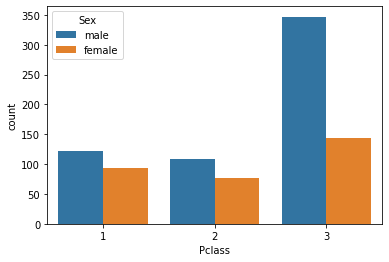

In [ ]:
print(data[data.Pclass == 2].Sex.value_counts()['male'], 'мужчин 2-го класса')
sb.countplot(x='Pclass', hue='Sex', data=data)

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- **Медиана – 14.45, стандартное отклонение – 49.69**
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [ ]:
print('Медиана –', round(data.Fare.median(), 2), ', стандартное отклонение –', round(data.Fare.std(), 2))

Медиана – 14.45 , стандартное отклонение – 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- **40.6% среди молодых и 22.7% среди старых**
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [ ]:
print(round(data[data.Age < 30].Survived.value_counts(normalize=True)[1] * 100, 1), '% среди молодых и', \
      round(data[data.Age > 60].Survived.value_counts(normalize=True)[1] * 100, 1), '% среди старых')

40.6 % среди молодых и 22.7 % среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- **18.9% среди мужчин и 74.2% среди женщин**

In [ ]:
print(round(data[data.Sex == 'male'].Survived.value_counts(normalize=True)[1] * 100, 1), '% среди мужчин и', \
      round(data[data.Sex == 'female'].Survived.value_counts(normalize=True)[1] * 100, 1), '% среди женщин')

18.9 % среди мужчин и 74.2 % среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- **John**

In [ ]:
print(data.Name.str.split().str[-1].value_counts().head(1))

John    16
Name: Name, dtype: int64


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- **Да**
- Нет

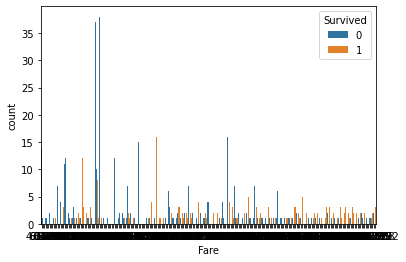

In [ ]:
sb.countplot(x='Fare', hue='Survived', data=data)

True


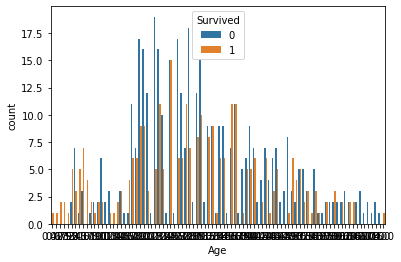

In [ ]:
sb.countplot(x='Age', hue='Survived', data=data)
print(data[data.Survived == 0].Age.mean() > data[data.Survived == 1].Age.mean())

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- **В среднем мужчины 1-го класса старше 40 лет**
- В среднем женщины 1-го класса старше 40 лет
- **Мужчины всех классов в среднем старше женщин того же класса**
- **В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса**

In [ ]:
print(data[(data.Sex == 'male') & (data.Pclass == 1)].Age.mean() > 40, \
      data[(data.Sex == 'female') & (data.Pclass == 1)].Age.mean() > 40, \
      data.groupby(['Sex', 'Pclass']).describe()['Age']['mean'], \
      data[data.Pclass == 1].Age.mean() > data[data.Pclass == 2].Age.mean() > data[data.Pclass == 3].Age.mean(), \
      sep='\n')

True
False
Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: mean, dtype: float64
True
